In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('./weatherAUS.csv')

In [4]:
PLOT = True

# 1. Analisis exploratorio de datos.

In [5]:
data.shape

(145460, 23)

#### Previsualizacion los datos.

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
data.sample(10)

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
80432   08/12/2015       Watsonia     19.9     36.0       1.8          1.6   
47210   11/05/2012       Canberra      7.7     20.8       0.4          3.6   
15674   22/07/2010      Newcastle      4.5     16.2       0.0          NaN   
80860   08/02/2017       Watsonia     15.0     35.7       0.0          6.6   
142545  28/10/2013      Katherine     24.9     39.0       0.0         12.0   
30188   13/02/2008         Sydney     18.4     22.8      14.4          7.0   
35740   29/04/2015  SydneyAirport     10.7     18.4       0.4          4.0   
93586   03/10/2009     Townsville     21.2     30.3       0.0          9.0   
26204   06/11/2014        Penrith     13.4     24.3      30.0          NaN   
34975   25/03/2013  SydneyAirport     18.6     25.8       0.0          7.0   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
80432        8.8         SSW           56.0         NE          N   
47210        9.9          NW           44.0          N        WNW   
15674        NaN         NaN            NaN         NW         SW   
80860       12.7         NaN            NaN        ENE        NNE   
142545       NaN          NE           37.0          N        ENE   
30188        3.3         NaN            NaN          S          S   
35740        0.9         SSW           48.0        NNW        SSE   
93586        8.8         ENE           31.0        SSE        NNE   
26204        NaN           E           24.0        SSW        ESE   
34975       11.0         SSW           39.0         NW        SSE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
80432           20.0          26.0         61.0         36.0       1009.2   
47210           22.0          30.0         70.0         40.0       1019.1   
15674            7.0          19.0         66.0         65.0          NaN   
80860            6.0          13.0         78.0         34.0       1019.0   
142545          15.0          19.0         58.0         23.0       1013.4   
30188           24.0          30.0         87.0         70.0       1009.2   
35740           11.0          26.0         72.0         71.0       1030.6   
93586            9.0          11.0         62.0         59.0       1015.0   
26204           11.0          13.0         70.0         52.0          NaN   
34975           13.0          24.0         55.0         71.0       1018.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
80432        1004.6       7.0       5.0     24.6     33.3       Yes   
47210        1015.9       5.0       NaN     14.3     18.8        No   
15674           NaN       6.0       5.0     10.5     14.8        No   
80860        1014.2       1.0       1.0     20.3     34.7        No   
142545       1008.1       2.0       5.0     31.2     38.3        No   
30188        1011.7       8.0       7.0     20.9     21.0       Yes   
35740        1028.9       6.0       7.0     15.0     18.1        No   
93586        1009.8       5.0       0.0     26.9     28.6        No   
26204           NaN       NaN       NaN     18.0     23.2       Yes   
34975        1017.7       1.0       2.0     21.8     24.8        No   

       RainTomorrow  
80432            No  
47210            No  
15674           Yes  
80860            No  
142545           No  
30188           Yes  
35740           Yes  
93586            No  
26204            No  
34975            No

In [8]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Solo las variables Date y Location contienen la totalidad de los datos. 

In [9]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = (df.isnull().sum().sort_values(ascending = False)/len(df)*100)[df.isnull().sum().sort_values(ascending = False) != 0]
    return pd.concat([total, round(percent,2)], axis=1, keys=['Total', 'Percent'])

In [10]:
missing_percentage(data)

Total  Percent
Sunshine       69835    48.01
Evaporation    62790    43.17
Cloud3pm       59358    40.81
Cloud9am       55888    38.42
Pressure9am    15065    10.36
Pressure3pm    15028    10.33
WindDir9am     10566     7.26
WindGustDir    10326     7.10
WindGustSpeed  10263     7.06
Humidity3pm     4507     3.10
WindDir3pm      4228     2.91
Temp3pm         3609     2.48
RainTomorrow    3267     2.25
Rainfall        3261     2.24
RainToday       3261     2.24
WindSpeed3pm    3062     2.11
Humidity9am     2654     1.82
Temp9am         1767     1.21
WindSpeed9am    1767     1.21
MinTemp         1485     1.02
MaxTemp         1261     0.87

In [11]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

##### Propiedades estadísticas del conjunto de datos.

In [12]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

# 2. Analisis univariado.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(df, column, ax):
    plot = sns.histplot(df[column], bins=50, ax=ax, kde=True, color='blue') 
    plot.get_lines()[0].set_color('red')  
    ax.set_xlabel(column, fontsize=18)
    ax.set_ylabel('Frequency', fontsize=18)

def print_statistics(df, column, ax):
    stats = f"""
    Mean: {df[column].mean():.2f}
    Median: {df[column].median():.2f}
    Mode: {df[column].mode()[0]:.2f}
    Std Dev: {df[column].std():.2f}
    Variance: {df[column].var():.2f}
    Skewness: {df[column].skew():.2f}
    Kurtosis: {df[column].kurt():.2f}
    """
    ax.axis('off')
    ax.text(0.2, 0.5, stats, horizontalalignment='left', verticalalignment='center', fontsize=20)

def plot_histogram_and_statistics(df, column):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    plot_histogram(df, column, axs[0])
    print_statistics(df, column, axs[1])
    plt.tight_layout()
    plt.show()

### Exploracion de la variable objetivo RainTomorrow.

In [14]:
data['RainTomorrow'].isnull().sum()

3267

Hay 3267 valores faltantes en la variable objetivo.

In [15]:
data['RainTomorrow'].nunique()

2

In [16]:
data['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

**Distribución de frecuencia de los valores:**

In [17]:
data['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

**Porcentaje de distribución de frecuencia de valores:**

In [18]:
data['RainTomorrow'].value_counts()/len(data)

RainTomorrow
No     0.758394
Yes    0.219146
Name: count, dtype: float64

**Visualizacion de la distribución de frecuencias de la variable RainTomorrow:**

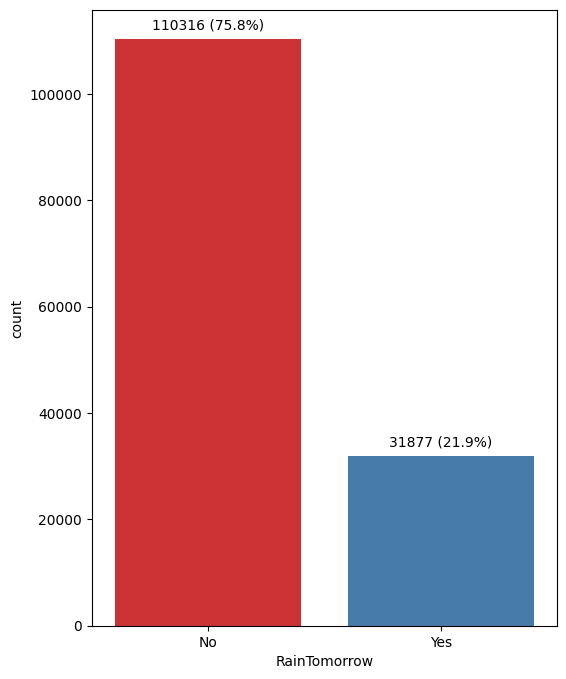

In [19]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", hue="RainTomorrow", data=data, palette="Set1", legend=False)

total = len(data)
for p in ax.patches:
    count = format(p.get_height(), '.0f')
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count} ({percentage})', (x, y), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# 3. Analisis bivariado.

#### Declaracion de funciones.

In [20]:
def get_dummies(df, column):
    # dummies = pd.get_dummies(df[column], drop_first=True, dummy_na=True)
    dummies = pd.get_dummies(df[column], drop_first=True, dummy_na=False)
    return dummies

def print_missing_values(df, column, dummies):
    print(f"Summary for column: {column}")
    print(dummies.sum(axis=0))
    
    missing_values = df[column].isnull().sum()
    print(f"Missing values: {missing_values}")
    
    missing_percentage = (missing_values / len(df)) * 100
    print(f"Missing percentage: {round(missing_percentage, 2)}%")

## 3.1 Variables categoricas.

In [21]:
def categorical_columns(df):
    return df.select_dtypes(include=['object']).columns

def print_categoical_columns(data):
    categorical = categorical_columns(data)
    null_counts = {col: data[col].isnull().sum() for col in categorical}
    sorted_columns = sorted(null_counts.items(), key=lambda x: x[1], reverse=True)
    
    print('Categorical columns:')
    for col, null_count in sorted_columns:      
        print(f'{col.ljust(15)} {null_count} {str('null values.').ljust(15)} \t {data[col].nunique()} unique values.')

In [22]:
print_categoical_columns(data)

Categorical columns:
WindDir9am      10566 null values.    	 16 unique values.
WindGustDir     10326 null values.    	 16 unique values.
WindDir3pm      4228 null values.    	 16 unique values.
RainTomorrow    3267 null values.    	 2 unique values.
RainToday       3261 null values.    	 2 unique values.
Date            0 null values.    	 3436 unique values.
Location        0 null values.    	 49 unique values.


In [23]:
data[categorical_columns(data).values].sample(10)

Date       Location WindGustDir WindDir9am WindDir3pm RainToday  \
141998  24/08/2016         Darwin         WNW        NNW        WNW        No   
44924   02/09/2015     Wollongong          NE        NaN         NE        No   
125979  24/02/2015     SalmonGums         NNE         NE        NNE        No   
82207   24/05/2012       Dartmoor         SSE        SSE         SE       Yes   
27187   21/01/2009       Richmond         SSW        NNE         NW        No   
140942  03/10/2013         Darwin         SSE         SW         NW        No   
5820    09/11/2016  BadgerysCreek           E         SE        ESE       Yes   
57632   02/02/2016       Ballarat           N        NNE          N        No   
106696  10/03/2012        Woomera          SE         SE          S        No   
117539  28/03/2017     PearceRAAF         SSW          S        SSW        No   

       RainTomorrow  
141998           No  
44924           Yes  
125979           No  
82207           Yes  
27187           Yes  
140942          Yes  
5820            Yes  
57632           Yes  
106696           No  
117539           No

De las variables categóricas, 2 de ellas son binarias: 
- RainToday.
- RainTomorrow (variable objetivo).

### Exploracion de variables categóricas.

**Recuento de frecuencia de variables categóricas.**

In [24]:
for var in data[categorical_columns(data).values]:     
    print(data[var].value_counts())

Date
12/11/2013    49
01/09/2014    49
23/08/2014    49
24/08/2014    49
25/08/2014    49
              ..
29/11/2007     1
28/11/2007     1
27/11/2007     1
26/11/2007     1
31/01/2008     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAA

Distribución de frecuencias de las variables categóricas:

In [25]:
for var in data[categorical_columns(data).values]:    
    print(data[var].value_counts()/np.float64(len(data)))

Date
12/11/2013    0.000337
01/09/2014    0.000337
23/08/2014    0.000337
24/08/2014    0.000337
25/08/2014    0.000337
                ...   
29/11/2007    0.000007
28/11/2007    0.000007
27/11/2007    0.000007
26/11/2007    0.000007
31/01/2008    0.000007
Name: count, Length: 3436, dtype: float64
Location
Canberra            0.023622
Sydney              0.022989
Darwin              0.021951
Melbourne           0.021951
Brisbane            0.021951
Adelaide            0.021951
Perth               0.021951
Hobart              0.021951
Albany              0.020899
MountGambier        0.020899
Ballarat            0.020899
Townsville          0.020899
GoldCoast           0.020899
Cairns              0.020899
Launceston          0.020899
AliceSprings        0.020899
Bendigo             0.020899
Albury              0.020899
MountGinini         0.020899
Wollongong          0.020899
Newcastle           0.020892
Tuggeranong         0.020892
Penrith             0.020892
Woomera             0.02

### Cardinalidad.

Analisis de variables que puedan tener alta cardinalidad.

In [26]:
max_length = max(len(var) for var in data[categorical_columns(data).values])

for var in data[categorical_columns(data).values]:    
    print(f'{var.ljust(max_length)} \t{len(data[var].unique())} labels.')

Date         	3436 labels.
Location     	49 labels.
WindGustDir  	17 labels.
WindDir9am   	17 labels.
WindDir3pm   	17 labels.
RainToday    	3 labels.
RainTomorrow 	3 labels.


### 3.1.1 Variable Date.

Extraccion de valores Year, Month, and Day de la variable Date en nuevas columnas.

In [27]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [29]:
data.drop('Date', axis=1, inplace = True)

In [30]:
print_categoical_columns(data)

Categorical columns:
WindDir9am      10566 null values.    	 16 unique values.
WindGustDir     10326 null values.    	 16 unique values.
WindDir3pm      4228 null values.    	 16 unique values.
RainTomorrow    3267 null values.    	 2 unique values.
RainToday       3261 null values.    	 2 unique values.
Location        0 null values.    	 49 unique values.


In [31]:
data.sample(10)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
15744       Newcastle      7.2     19.0       0.0          NaN       NaN   
111627    Witchcliffe     15.8     26.7       0.0          NaN       NaN   
134448     Launceston      3.2     18.0       0.0          NaN       NaN   
54310     MountGinini      0.9      8.3       3.0          NaN       NaN   
23305   NorfolkIsland     18.8     25.8       0.0          5.6      10.3   
14477           Moree     19.6     27.2      39.8         13.0       NaN   
92133       GoldCoast     13.4     22.8       0.0          NaN       NaN   
1452           Albury     16.6     36.5       0.2          NaN       NaN   
105952        Woomera     25.2     41.1       0.0          NaN       NaN   
32830          Sydney      6.8     16.4       0.0          3.8       8.5   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
15744          NaN            NaN        NaN         SE           0.0   
111627         SSE           50.0        SSE          S          28.0   
134448         NNW           33.0        NaN         NW           0.0   
54310            S           54.0          S         SW          20.0   
23305          NNE           30.0         NE          N          15.0   
14477            E           52.0          E          E          33.0   
92133          NaN            NaN        NaN        SSE           NaN   
1452           WSW           52.0          S          W           7.0   
105952          SE           43.0         SE         SE          20.0   
32830          WSW           37.0        WNW          S          22.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
15744            6.0         55.0         42.0          NaN          NaN   
111627          26.0         62.0         53.0       1017.8       1017.7   
134448          19.0         42.0         45.0       1016.2       1013.9   
54310           15.0        100.0        100.0          NaN          NaN   
23305            7.0         56.0         53.0       1020.7       1018.8   
14477           33.0         93.0         81.0       1011.6       1008.3   
92133           19.0         54.0         55.0       1020.4       1017.6   
1452            26.0         63.0         11.0       1009.1       1006.7   
105952          19.0         23.0         12.0       1010.1       1008.3   
32830           11.0         53.0         39.0       1016.5       1016.7   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  Year  \
15744        3.0       1.0     14.5     17.7        No           No  2010   
111627       NaN       NaN     21.3     25.9        No           No  2009   
134448       NaN       NaN     12.9     16.6        No           No  2012   
54310        NaN       NaN      4.0      4.5       Yes           No  2015   
23305        1.0       5.0     23.0     24.7        No           No  2015   
14477        8.0       7.0     20.5     21.8       Yes          Yes  2015   
92133        NaN       NaN     19.3     21.8        No           No  2014   
1452         NaN       NaN     24.2     35.6        No           No  2013   
105952       NaN       NaN     29.3     38.9        No           No  2010   
32830        3.0       7.0      9.5     14.3        No           No  2015   

        Month  Day  
15744       9   30  
111627      1   17  
134448     11   17  
54310       4   26  
23305       3   26  
14477      11    5  
92133       5    6  
1452        1   22  
105952      1   26  
32830       8    6

### 3.1.2 Variable Location.

Distribución de frecuencia de los valores en la variable Location.

In [32]:
data.Location.value_counts()

Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

In [33]:
# One Hot Encoding.
dummies = get_dummies(data, 'Location')
dummies.sample(10)

Albany  Albury  AliceSprings  BadgerysCreek  Ballarat  Bendigo  \
144476   False   False         False          False     False    False   
113770   False   False         False          False     False    False   
120950   False   False         False          False     False    False   
120393   False   False         False          False     False    False   
131708   False   False         False          False     False    False   
143278   False   False         False          False     False    False   
126588   False   False         False          False     False    False   
20015    False   False         False          False     False    False   
64062    False   False         False          False     False    False   
5259     False   False         False           True     False    False   

        Brisbane  Cairns  Canberra  Cobar  CoffsHarbour  Dartmoor  Darwin  \
144476     False   False     False  False         False     False   False   
113770     False   False     False  False         False     False   False   
120950     False   False     False  False         False     False   False   
120393     False   False     False  False         False     False   False   
131708     False   False     False  False         False     False   False   
143278     False   False     False  False         False     False   False   
126588     False   False     False  False         False     False   False   
20015      False   False     False  False         False     False   False   
64062      False   False     False  False         False     False   False   
5259       False   False     False  False         False     False   False   

        GoldCoast  Hobart  Katherine  Launceston  Melbourne  MelbourneAirport  \
144476      False   False      False       False      False             False   
113770      False   False      False       False      False             False   
120950      False   False      False       False      False             False   
120393      False   False      False       False      False             False   
131708      False    True      False       False      False             False   
143278      False   False       True       False      False             False   
126588      False   False      False       False      False             False   
20015       False   False      False       False      False             False   
64062       False   False      False       False      False             False   
5259        False   False      False       False      False             False   

        Mildura  Moree  MountGambier  MountGinini  Newcastle   Nhil  \
144476    False  False         False        False      False  False   
113770    False  False         False        False      False  False   
120950    False  False         False        False      False  False   
120393    False  False         False        False      False  False   
131708    False  False         False        False      False  False   
143278    False  False         False        False      False  False   
126588    False  False         False        False      False  False   
20015     False  False         False        False      False  False   
64062     False  False         False        False      False  False   
5259      False  False         False        False      False  False   

        NorahHead  NorfolkIsland  Nuriootpa  PearceRAAF  Penrith  Perth  \
144476      False          False      False       False    False  False   
113770      False          False      False       False    False  False   
120950      False          False      False       False    False   True   
120393      False          False      False       False    False  False   
131708      False          False      False       False    False  False   
143278      False          False      False       False    False  False   
126588      False          False      False       False    False  False   
20015        True          False      False       False    False  False

In [34]:
print_missing_values(data, 'Location', dummies)

Summary for column: Location
Albany              3040
Albury              3040
AliceSprings        3040
BadgerysCreek       3009
Ballarat            3040
Bendigo             3040
Brisbane            3193
Cairns              3040
Canberra            3436
Cobar               3009
CoffsHarbour        3009
Dartmoor            3009
Darwin              3193
GoldCoast           3040
Hobart              3193
Katherine           1578
Launceston          3040
Melbourne           3193
MelbourneAirport    3009
Mildura             3009
Moree               3009
MountGambier        3040
MountGinini         3040
Newcastle           3039
Nhil                1578
NorahHead           3004
NorfolkIsland       3009
Nuriootpa           3009
PearceRAAF          3009
Penrith             3039
Perth               3193
PerthAirport        3009
Portland            3009
Richmond            3009
Sale                3009
SalmonGums          3001
Sydney              3344
SydneyAirport       3009
Townsville          3

### 3.1.3 Variable de WindGustDir.

In [35]:
data.WindGustDir.value_counts()

WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: count, dtype: int64

In [3]:
# One Hot Encoding
dummies = get_dummies(data, 'WindGustDir')
dummies.sample(10)

NameError: name 'data' is not defined

In [37]:
print_missing_values(data, 'WindGustDir', dummies)

Summary for column: WindGustDir
ENE    8104
ESE    7372
N      9313
NE     7133
NNE    6548
NNW    6620
NW     8122
S      9168
SE     9418
SSE    9216
SSW    8736
SW     8967
W      9915
WNW    8252
WSW    9069
dtype: int64
Missing values: 10326
Missing percentage: 7.1%


### 3.1.4 Variable de WindDir9am.

In [38]:
columm = 'WindDir9am'
print_missing_values(data, columm, get_dummies(data, columm))

Summary for column: WindDir9am
ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
dtype: int64
Missing values: 10566
Missing percentage: 7.26%


### 3.1.4 Variable de WindDir3pm.

In [39]:
columm = 'WindDir9am'
print_missing_values(data, columm, get_dummies(data, columm))

Summary for column: WindDir9am
ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
dtype: int64
Missing values: 10566
Missing percentage: 7.26%


### 3.1.4 Variable de RainToday.

In [40]:
columm = 'RainToday'
print_missing_values(data, columm, get_dummies(data, columm))

Summary for column: RainToday
Yes    31880
dtype: int64
Missing values: 3261
Missing percentage: 2.24%


## 3.2 Variables numericas.

In [41]:
def numerical_columns(df):
    return df.select_dtypes(include=['float64', 'int64']).columns

def print_numerical_columns(data):
    numerical = numerical_columns(data)
    null_counts = {col: data[col].isnull().sum() for col in numerical}
    sorted_columns = sorted(null_counts.items(), key=lambda x: x[1], reverse=True)
    
    print('Numerical columns:')
    for col, null_count in sorted_columns:
        print(f'{col} \t {null_count} null values.')

In [42]:
print_numerical_columns(data)

Numerical columns:
Sunshine 	 69835 null values.
Evaporation 	 62790 null values.
Cloud3pm 	 59358 null values.
Cloud9am 	 55888 null values.
Pressure9am 	 15065 null values.
Pressure3pm 	 15028 null values.
WindGustSpeed 	 10263 null values.
Humidity3pm 	 4507 null values.
Temp3pm 	 3609 null values.
Rainfall 	 3261 null values.
WindSpeed3pm 	 3062 null values.
Humidity9am 	 2654 null values.
WindSpeed9am 	 1767 null values.
Temp9am 	 1767 null values.
MinTemp 	 1485 null values.
MaxTemp 	 1261 null values.


In [43]:
data[numerical_columns(data).values].sample(10)

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
116451     13.5     31.5       0.0          NaN       8.5           31.0   
97668      12.4     19.4       3.4          NaN       4.5           35.0   
116770     15.4     38.7       0.0          NaN       9.1           37.0   
117443     19.8     29.4       0.0          NaN       9.4           39.0   
95268      14.5     24.8       0.0          8.0       5.0           39.0   
25166      13.1     29.4       0.2          NaN       NaN           30.0   
119851     11.8     22.5       0.0          4.0       9.6           46.0   
9466       21.7     29.8       0.0          6.8      11.2           41.0   
10690      11.9     24.5       0.0          2.8       9.7           35.0   
75986      10.5     16.2       3.8          1.6       6.4           33.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
116451           4.0          22.0         27.0         21.0       1011.7   
97668           13.0          17.0         51.0         43.0       1027.1   
116770           6.0          26.0         64.0         30.0       1013.3   
117443          24.0          20.0         69.0         43.0       1009.8   
95268            9.0          28.0         55.0         49.0       1023.8   
25166           13.0          13.0         65.0         39.0          NaN   
119851          22.0          11.0         48.0         31.0       1020.6   
9466             6.0          24.0         72.0         57.0       1011.7   
10690           15.0          20.0         41.0         48.0       1008.3   
75986           13.0          24.0         89.0         70.0       1017.9   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
116451       1007.5       NaN       4.0     23.4     31.1  
97668        1027.2       NaN       NaN     16.3     18.8  
116770       1012.0       2.0       6.0     24.5     34.5  
117443       1007.6       8.0       NaN     21.7     28.4  
95268        1020.0       6.0       7.0     19.7     23.9  
25166           NaN       NaN       NaN     19.7     28.7  
119851       1016.8       2.0       1.0     17.9     22.2  
9466         1009.6       2.0       5.0     26.7     29.6  
10690        1004.2       1.0       1.0     21.0     23.4  
75986        1018.8       7.0       6.0     12.4     15.1

Todas las variables numéricas son de tipo continuo.

## 3.3 Inspeccion de valores atipicos.

In [44]:
data[numerical_columns(data).values].describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

Basándonos en el resumen estadístico, las columnas que podrían contener valores atípicos son aquellas donde la diferencia entre el valor máximo y el percentil 75, o el valor mínimo y el percentil 25, es significativamente grande.

- Rainfall: El valor máximo es 371, mientras que el percentil 75 es 0.8.
- Evaporation: El valor máximo es 145, mientras que el percentil 75 es 7.4.
- WindGustSpeed: El valor máximo es 135, mientras que el percentil 75 es 48.
- WindSpeed9am: El valor máximo es 130, mientras que el percentil 75 es 19.

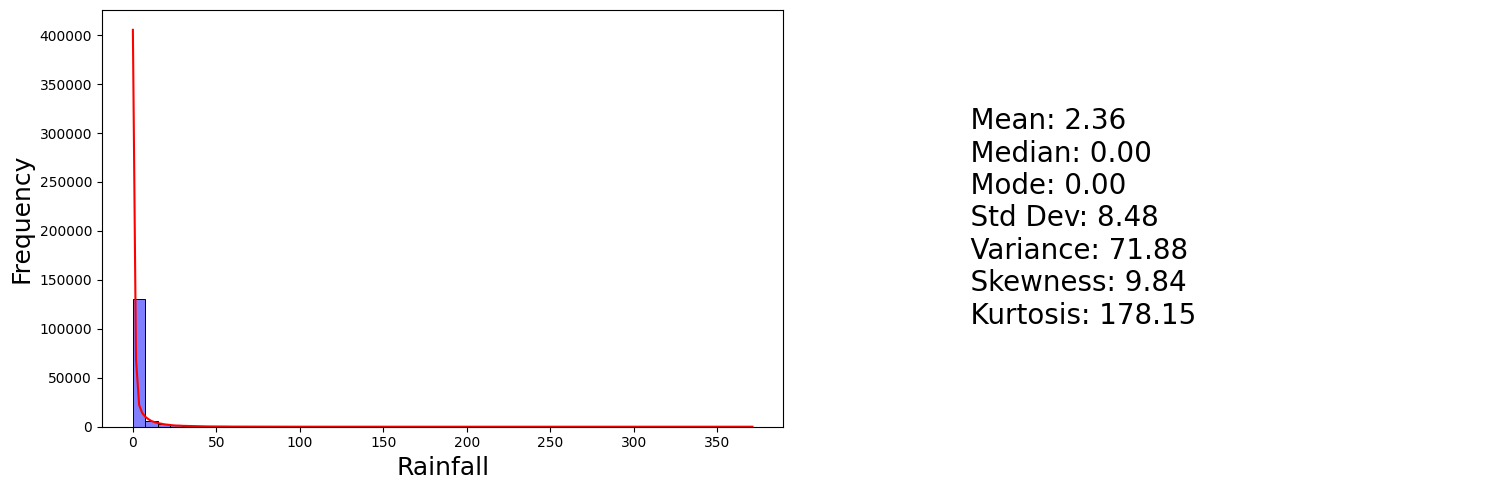

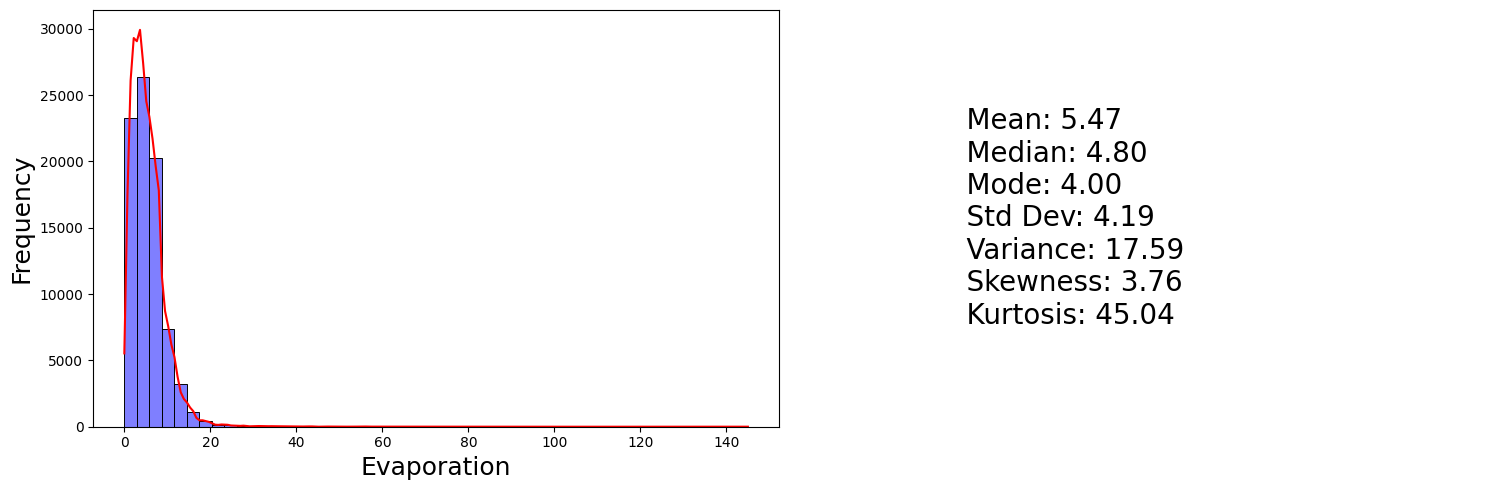

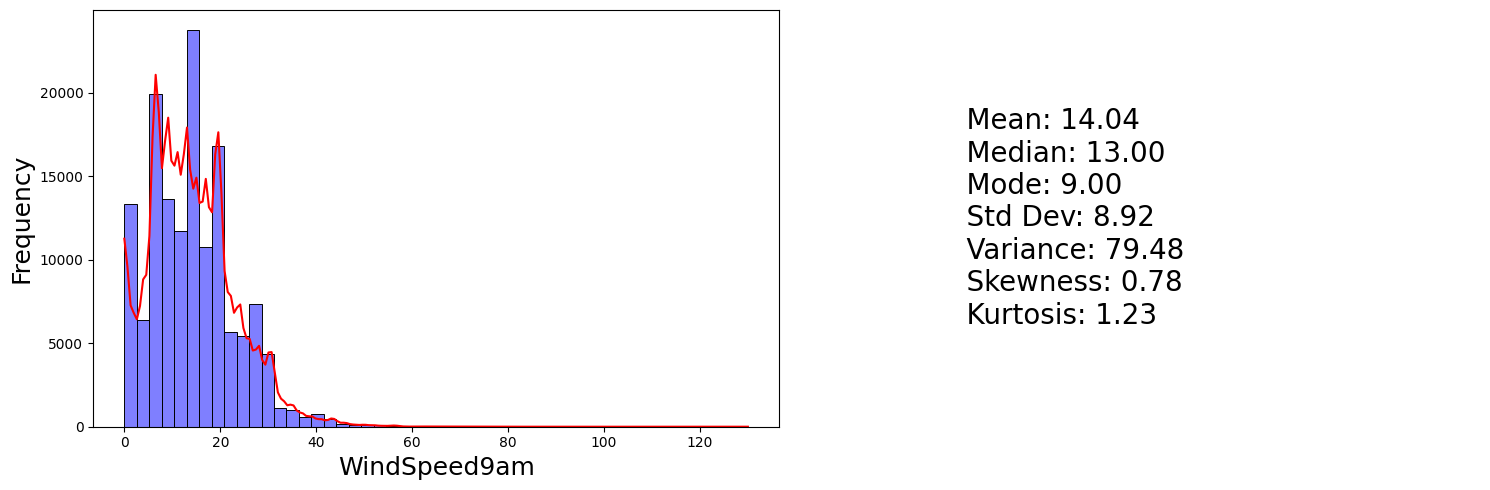

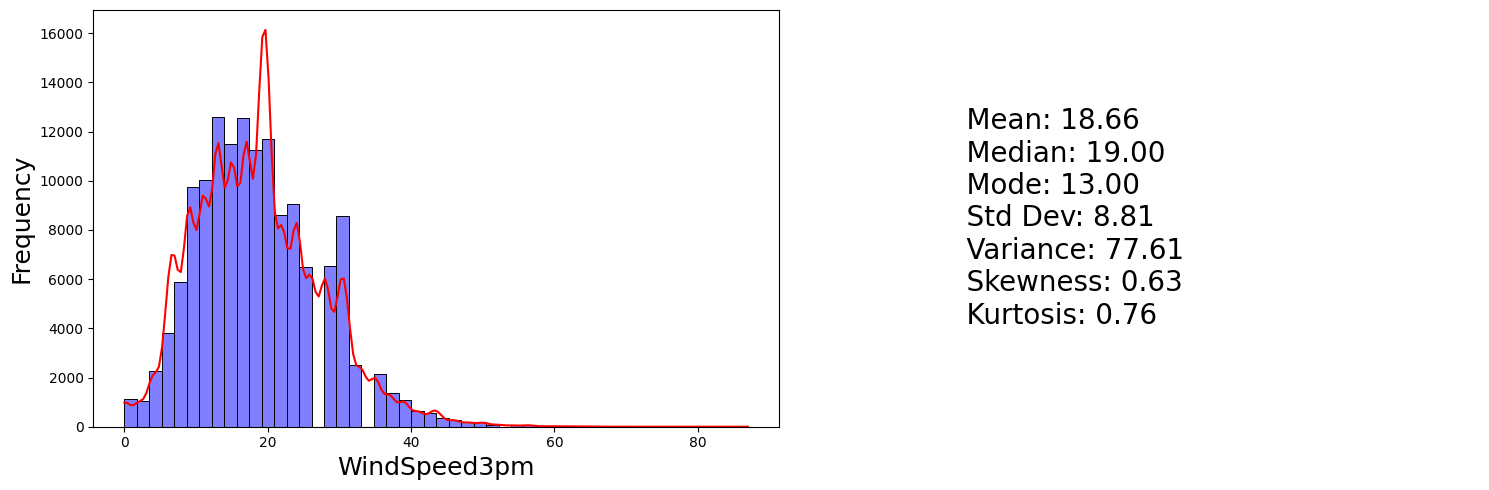

In [45]:
columns = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']
for col in columns:
    plot_histogram_and_statistics(data, col)

### 3.3.1 Diagramas boxplot y QQ-Plot

In [46]:
import matplotlib.pyplot as plt
import scipy.stats as stats

def draw_plots(df, columns):
    for column in columns:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

        # Boxplot
        axs[0].boxplot(df[column].dropna())
        axs[0].set_title(f'Boxplot of {column}')

        # QQ-Plot
        stats.probplot(df[column].dropna(), dist="norm", plot=axs[1])
        axs[1].set_title(f'QQ-Plot of {column}')

        plt.tight_layout()
        plt.show()

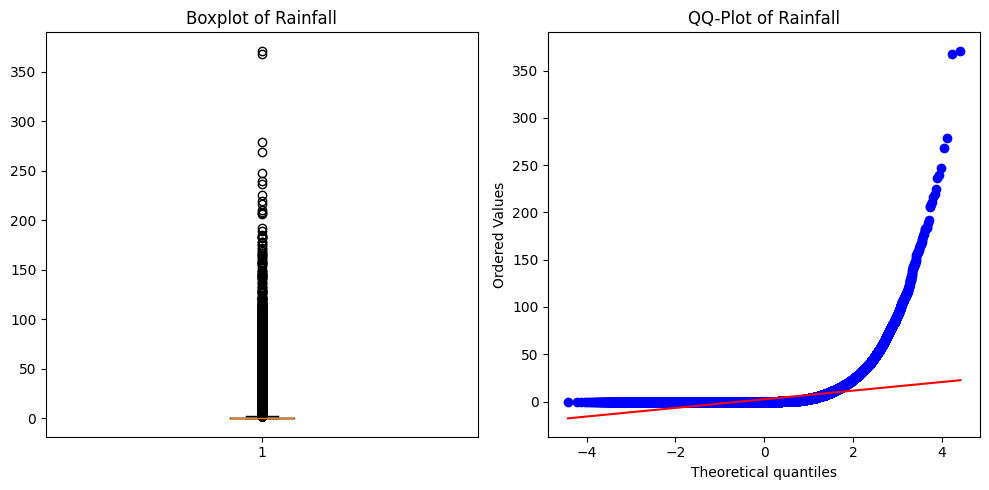

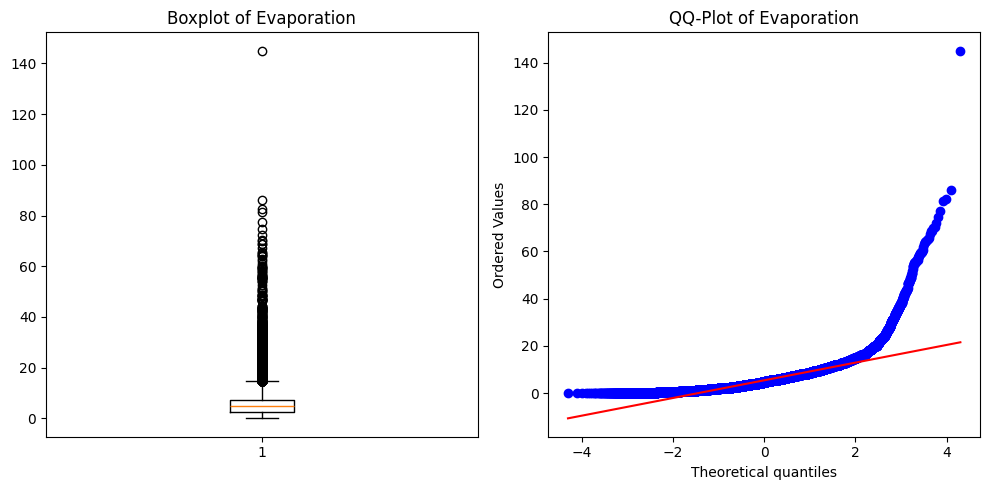

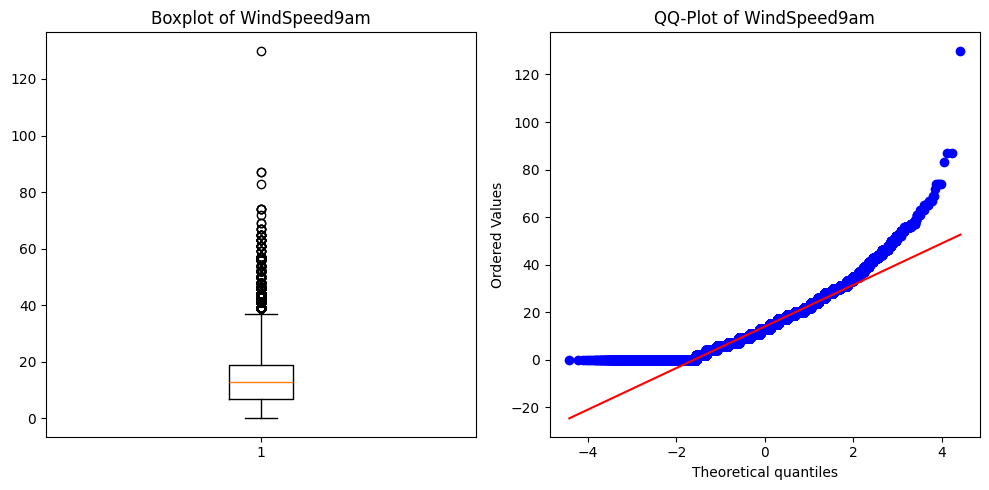

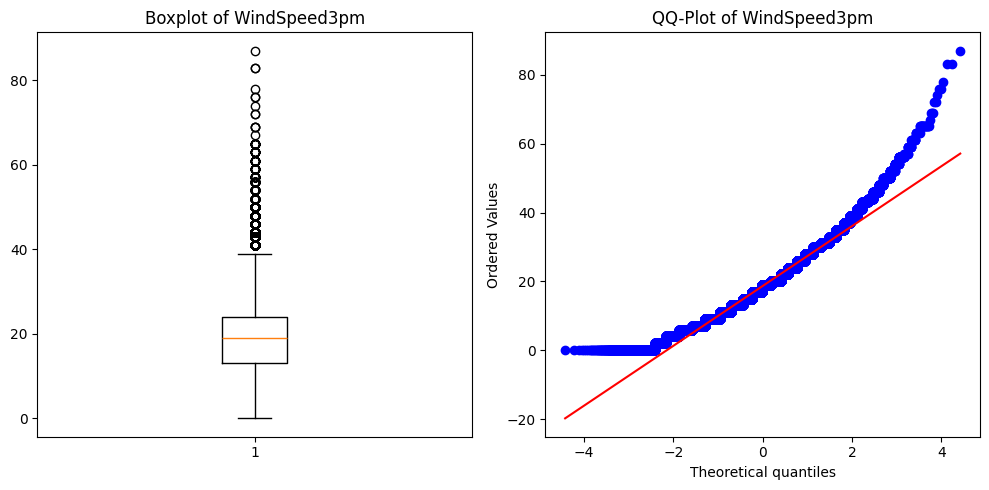

In [47]:
# columns = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']
draw_plots(data, columns)

## 3.4 Distribución de las variables.

Las cuatro variables están sesgadas. 

In [48]:
top_20_rainfall = data.nlargest(20, 'Evaporation')
top_20_rainfall

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
42358     Williamtown     15.3     23.9      58.2        145.0       NaN   
8831            Cobar     19.1     35.3       0.0         86.2       NaN   
106968        Woomera     24.6     45.3       0.0         82.4       NaN   
105935        Woomera     26.6     41.7       0.0         81.2      13.2   
107290        Woomera     14.4     27.2       3.0         77.3       NaN   
23954   NorfolkIsland     19.4     26.1       0.0         74.8       NaN   
105965        Woomera     25.7     39.7       0.0         72.2      13.0   
107968        Woomera     21.0     34.2       0.0         70.4       NaN   
105949        Woomera     17.0     33.1       0.0         70.0      11.7   
107599        Woomera     11.0     26.7       0.0         68.8       NaN   
107668        Woomera     21.5     38.3       0.0         68.8       NaN   
108390        Woomera     22.2     31.5       4.8         67.2       NaN   
8845            Cobar      8.0     28.0       0.4         65.8       NaN   
14616           Moree     14.3     31.0       5.8         65.4      11.2   
6809            Cobar     22.1     39.1       0.0         64.8       NaN   
41294     Williamtown     20.5     28.5       0.0         64.4       NaN   
106287        Woomera     12.8     27.9       0.0         64.0       NaN   
108004        Woomera     27.0     38.1       0.0         64.0       NaN   
105940        Woomera     16.3     31.7       0.0         63.0      13.2   
107269        Woomera     21.3     40.5       0.0         62.0       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
42358          NaN            NaN        NaN          E           NaN   
8831           NNW           35.0         NW         NW          13.0   
106968          SE           74.0        ESE        ENE          17.0   
105935           N           48.0         NE        NNE          17.0   
107290           S           56.0          S        SSW          28.0   
23954          ENE           30.0         NE          E          15.0   
105965          SE           50.0          E          E          15.0   
107968         WSW           61.0         SW        WSW          19.0   
105949           S           48.0        SSE          S          31.0   
107599          SE           33.0          S        SSW          24.0   
107668          SE           44.0        ESE        SSW          15.0   
108390          NE           93.0          E         NE          33.0   
8845            SW           37.0          S         SW          13.0   
14616          SSE           31.0          E        SSE          17.0   
6809             N           37.0        NNE        NNW           9.0   
41294          SSE           41.0          E         SE           9.0   
106287           S           54.0        SSE         SE          35.0   
108004         WNW          122.0         SW        WNW          11.0   
105940         SSE           48.0         SE        SSE          22.0   
107269           W           37.0         SE         SW           9.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
42358           30.0         72.0         52.0       1020.8       1017.0   
8831            15.0          NaN          NaN       1009.3       1004.6   
106968          13.0         22.0          9.0       1013.8       1009.4   
105935          20.0         22.0         10.0       1013.9       1011.9   
107290          28.0         65.0         30.0       1016.1       1015.2   
23954           11.0         66.0         67.0       1014.5       1013.7   
105965          19.0         26.0         18.0       1016.3       1013.6   
107968          31.0         33.0         21.0       1011.0       1008.7   
105949          24.0         55.0         17.0       1013.9       1011.2   
107599          19.0         48.0         16.0       1021.4       1019.0   
107668          13.0         46.0         25.0

In [49]:
# data2 = data.copy()

In [50]:
# data2.sample(10)

In [51]:
def map_yes_no(df, column):
    df[column] = df[column].map({'No': 0, 'Yes': 1})

In [52]:
columns_to_map = ['RainToday', 'RainTomorrow']

for column in columns_to_map:
    map_yes_no(data, column)

In [53]:
data.sample(10)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
84240        Brisbane     21.7     31.6       2.2          2.0      10.3   
118795   PerthAirport     17.6     32.4       0.0          7.4       9.6   
23208   NorfolkIsland     19.5     25.9       0.0          1.8       9.7   
59033         Bendigo      2.9     13.5       0.0          0.4       NaN   
143694      Katherine     25.0     34.5      26.8          8.0       NaN   
21028       NorahHead     20.0     27.6       0.0          NaN       NaN   
13421           Moree      9.8     30.2       0.0          6.6      12.0   
133568     Launceston     -1.2     12.0       0.2          NaN       NaN   
92434       GoldCoast     22.3     29.7       0.2          NaN       NaN   
144367          Uluru     -0.8     17.1       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
84240            W           31.0         SE        ENE           7.0   
118795         NNE           33.0        NNE        WSW          28.0   
23208           NE           35.0         NE         NE          19.0   
59033            S           43.0          S          S          19.0   
143694          NE           44.0         NE        NNE          20.0   
21028          NNE           48.0         NW         NE           4.0   
13421          NNE           41.0        NNE        NNE          30.0   
133568          SE           19.0        ESE          E           4.0   
92434          NaN            NaN        NaN        ESE           NaN   
144367         SSE           33.0          S        SSE           7.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
84240           13.0         72.0         62.0       1009.4       1006.1   
118795          20.0         17.0         19.0       1021.5       1019.8   
23208           22.0         83.0         82.0       1015.4       1013.8   
59033           15.0         75.0         65.0       1023.1       1024.0   
143694          28.0         74.0          NaN       1004.1        999.9   
21028           28.0         85.0         72.0       1017.0       1012.6   
13421           15.0         57.0         20.0       1023.2       1018.4   
133568           4.0         85.0         52.0       1025.9       1024.0   
92434           22.0         64.0         58.0       1015.9       1013.2   
144367          15.0         75.0         36.0       1026.2       1023.7   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  \
84240        4.0       2.0     27.2     31.1        1.0           1.0  2009   
118795       7.0       7.0     27.4     30.2        0.0           0.0  2012   
23208        5.0       7.0     23.6     24.9        0.0           1.0  2014   
59033        1.0       7.0     10.1     12.9        0.0           0.0  2011   
143694       8.0       NaN     29.0      NaN        1.0           0.0  2016   
21028        NaN       NaN     22.9     26.1        0.0           0.0  2017   
13421        0.0       1.0     19.5     28.7        0.0           0.0  2012   
133568       NaN       NaN      2.9     10.9        0.0           0.0  2010   
92434        NaN       NaN     27.2     28.8        0.0           NaN  2015   
144367       NaN       NaN      5.7     16.0        0.0           0.0  2014   

        Month  Day  
84240       2   19  
118795      4   11  
23208      12   19  
59033       6   10  
143694     12   20  
21028       3   27  
13421      10   16  
133568      5   22  
92434       3    3  
144367      6   29

In [54]:
correlation_matrix = data[numerical_columns(data).values].corr()
print(correlation_matrix)

                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555  0.103938     0.466993  0.072586   
MaxTemp        0.736555  1.000000 -0.074992     0.587932  0.470156   
Rainfall       0.103938 -0.074992  1.000000    -0.064351 -0.227549   
Evaporation    0.466993  0.587932 -0.064351     1.000000  0.365602   
Sunshine       0.072586  0.470156 -0.227549     0.365602  1.000000   
WindGustSpeed  0.177415  0.067615  0.133659     0.203021 -0.034750   
WindSpeed9am   0.175064  0.014450  0.087338     0.193084  0.005499   
WindSpeed3pm   0.175173  0.050300  0.057887     0.129400  0.053834   
Humidity9am   -0.232899 -0.504110  0.224405    -0.504092 -0.490819   
Humidity3pm    0.006089 -0.508855  0.255755    -0.390243 -0.629130   
Pressure9am   -0.450970 -0.332061 -0.168154    -0.270362  0.041970   
Pressure3pm   -0.461292 -0.427167 -0.126534    -0.293581 -0.019719   
Cloud9am       0.078754 -0.289370  0.198528    -0.183793 -0.675323   
Cloud3pm       0.021

Aquí está el análisis de la matriz de correlación:

MinTemp y MaxTemp: Estas dos variables están altamente correlacionadas (0.736555), lo que indica que a medida que la temperatura mínima aumenta, la temperatura máxima también tiende a aumentar. Esto tiene sentido ya que ambos son medidas de temperatura y están influenciados por factores similares.

MinTemp y Temp9am: Estas dos variables también están altamente correlacionadas (0.901821), lo que indica que a medida que la temperatura mínima aumenta, la temperatura a las 9 a.m. también tiende a aumentar. Esto es esperado ya que la temperatura a las 9 a.m. debería estar cerca de la temperatura mínima del día.

MaxTemp y Temp3pm: Estas dos variables están altamente correlacionadas (0.984503), lo que indica que a medida que la temperatura máxima aumenta, la temperatura a las 3 p.m. también tiende a aumentar. Esto es esperado ya que la temperatura a las 3 p.m. debería estar cerca de la temperatura máxima del día.

Humidity9am y Humidity3pm: Estas dos variables están correlacionadas negativamente (-0.508855), lo que indica que a medida que la humedad a las 9 a.m. aumenta, la humedad a las 3 p.m. tiende a disminuir. Esto podría ser debido a que la humedad tiende a disminuir a medida que el día avanza y la temperatura aumenta.

Sunshine y Cloud9am/Cloud3pm: Estas variables están correlacionadas negativamente (-0.675323 y -0.703930 respectivamente), lo que indica que a medida que la cantidad de sol aumenta, la cantidad de nubes tiende a disminuir. Esto tiene sentido ya que los días soleados tienden a tener menos nubes.

Pressure9am y Pressure3pm: Estas dos variables están correlacionadas negativamente (-0.427167), lo que indica que a medida que la presión a las 9 a.m. aumenta, la presión a las 3 p.m. tiende a disminuir. Esto podría ser debido a los cambios en la presión atmosférica a lo largo del día.

Rainfall y Sunshine: Estas dos variables están correlacionadas negativamente (-0.227549), lo que indica que a medida que la cantidad de lluvia aumenta, la cantidad de sol tiende a disminuir. Esto tiene sentido ya que los días lluviosos tienden a tener menos sol.



--
está el análisis de la matriz de correlación:

Correlaciones altas: Las variables MaxTemp y Temp3pm están altamente correlacionadas (0.984503), lo que indica que a medida que la temperatura máxima del día aumenta, la temperatura a las 3 pm también tiende a aumentar. Esto tiene sentido ya que ambos representan la temperatura en diferentes momentos del día. Podríamos considerar eliminar una de estas variables para simplificar el modelo.

Correlaciones negativas: Sunshine y Cloud3pm tienen una correlación negativa fuerte (-0.703930). Esto significa que a medida que aumenta la cantidad de sol, disminuye la cantidad de nubes a las 3 pm, lo cual es lógico ya que los días soleados tienden a tener menos nubes.

Correlaciones con la variable objetivo (RainTomorrow): Humidity3pm (0.446160) y RainToday (0.313097) están moderadamente correlacionadas con RainTomorrow. Esto sugiere que la humedad a las 3 pm y si llovió hoy pueden ser buenos indicadores de si lloverá mañana.

Correlaciones multivariables: Humidity9am y Humidity3pm están altamente correlacionadas (0.666949), lo que indica que la humedad en la mañana y en la tarde tienden a moverse juntas. Además, Pressure9am y Pressure3pm también están altamente correlacionadas (0.961326), lo que sugiere que la presión atmosférica en la mañana y en la tarde también tienden a moverse juntas.

#### Curtosis > 3.0.

In [55]:
# Encuentra la correlación más fuerte con 'Sunshine'
# max_corr_sunshine = correlation_matrix['Sunshine'].sort_values(ascending=False).index[1]

# Encuentra la correlación más fuerte con 'Rainfall'
max_corr_rainfall = correlation_matrix['Rainfall'].sort_values(ascending=False).index[1]

# Encuentra la correlación más fuerte con 'Evaporation'
max_corr_evaporation = correlation_matrix['Evaporation'].sort_values(ascending=False).index[1]

# print(f"La correlación más fuerte con 'Sunshine' es con '{max_corr_sunshine}'.")
print(f"La correlación más fuerte con 'Rainfall' es con '{max_corr_rainfall}'.")
print(f"La correlación más fuerte con 'Evaporation' es con '{max_corr_evaporation}'.")

La correlación más fuerte con 'Rainfall' es con 'RainToday'.
La correlación más fuerte con 'Evaporation' es con 'MaxTemp'.


In [56]:
def get_top_records_and_group(data, sort_col, select_cols, n):
    # Obtiene los 'n' registros con el valor más grande en 'sort_col'
    top_records = data.nlargest(n, sort_col)[select_cols]

    # Obtiene las ubicaciones únicas de los registros superiores
    unique_locations = top_records['Location'].unique()

    # Para cada ubicación, obtiene los 'n' registros superiores y los agrega a una lista
    top_records_per_location = []
    for location in unique_locations:
        top_n_for_location = data[data['Location'] == location].nlargest(n, sort_col)[select_cols]
        top_records_per_location.append(top_n_for_location)

    # Concatena todos los DataFrames en la lista en un solo DataFrame
    result = pd.concat(top_records_per_location)

    return result

In [57]:
size = 10

In [58]:
col = 'Rainfall'
cols = ['Location', 'Rainfall', 'RainToday']

top_records = get_top_records_and_group(data, col, cols, size)
top_records

Location  Rainfall  RainToday
9368    CoffsHarbour     371.0        1.0
11681   CoffsHarbour     219.6        1.0
10485   CoffsHarbour     208.5        1.0
9105    CoffsHarbour     189.0        1.0
10486   CoffsHarbour     172.2        1.0
10445   CoffsHarbour     159.8        1.0
11232   CoffsHarbour     157.8        1.0
10154   CoffsHarbour     153.2        1.0
10574   CoffsHarbour     147.8        1.0
11965   CoffsHarbour     142.8        1.0
140071        Darwin     367.6        1.0
142163        Darwin     210.6        1.0
140072        Darwin     184.6        1.0
140384        Darwin     182.2        1.0
139641        Darwin     162.2        1.0
142151        Darwin     145.6        1.0
140391        Darwin     145.2        1.0
140433        Darwin     142.2        1.0
139640        Darwin     141.2        1.0
139716        Darwin     136.4        1.0
87242         Cairns     278.4        1.0
87995         Cairns     268.6        1.0
89371         Cairns     247.2        1.0
88222         Cairns     206.2        1.0
88016         Cairns     183.0        1.0
89070         Cairns     175.2        1.0
88375         Cairns     161.6        1.0
89841         Cairns     158.0        1.0
88373         Cairns     150.2        1.0
87243         Cairns     140.2        1.0
17321      Newcastle     240.0        1.0
17579      Newcastle     216.3        1.0
15152      Newcastle     147.2        1.0
16800      Newcastle     132.5        1.0
17730      Newcastle      96.0        1.0
16539      Newcastle      89.8        1.0
16538      Newcastle      77.6        1.0
15780      Newcastle      75.6        1.0
18039      Newcastle      74.2        1.0
15274      Newcastle      71.4        1.0
93344     Townsville     236.8        1.0
93675     Townsville     206.8        1.0
93323     Townsville     177.6        1.0
95150     Townsville     174.6        1.0
94075     Townsville     170.4        1.0
93757     Townsville     165.2        1.0
95096     Townsville     164.6        1.0
94455     Townsville     148.6        1.0
94734     Townsville     144.2        1.0
95853     Townsville     124.8        1.0
42010    Williamtown     225.0        1.0
41231    Williamtown     166.8        1.0
40971    Williamtown     157.6        1.0
41750    Williamtown     156.0        1.0
39583    Williamtown     134.8        1.0
41751    Williamtown     114.4        1.0
42113    Williamtown     110.8        1.0
40966    Williamtown     104.2        1.0
42161    Williamtown      91.4        1.0
40442    Williamtown      86.8        1.0

En este caso, estamos viendo datos de lluvia, que pueden ser altamente variables y pueden tener eventos extremos (como tormentas fuertes o huracanes) que producen valores de lluvia muy altos. Además, la correlación fuerte entre 'Rainfall' y 'RainToday' sugiere que estos valores altos no son simplemente errores aleatorios, sino que están asociados con días de lluvia.

Además, si observamos los datos agrupados por ciudad, vemos que las ciudades con los valores más altos de 'Rainfall' también tienden a tener valores altos. Esto sugiere que estos valores altos pueden ser característicos de estas ubicaciones.

Por lo tanto, en base a la información proporcionada, parece más probable que estos valores atípicos sean propios de la naturaleza de los datos y no errores.

#### Evaporation.

In [59]:
col = 'Evaporation'
cols = ['Location', 'Evaporation', 'MaxTemp']

top_records = get_top_records_and_group(data, col, cols, size)
top_records

Location  Evaporation  MaxTemp
42358     Williamtown        145.0     23.9
41294     Williamtown         64.4     28.5
42316     Williamtown         59.2     33.0
42288     Williamtown         55.4     33.4
42370     Williamtown         47.0     32.2
41181     Williamtown         43.6     22.3
41203     Williamtown         40.0     35.4
41287     Williamtown         38.8     26.0
40856     Williamtown         38.0     25.0
40913     Williamtown         38.0     32.0
8831            Cobar         86.2     35.3
8845            Cobar         65.8     28.0
6809            Cobar         64.8     39.1
8852            Cobar         56.4     36.0
7790            Cobar         56.2     33.0
8838            Cobar         55.4     36.8
7804            Cobar         52.4     41.6
7454            Cobar         49.4     43.7
7784            Cobar         48.8     33.6
7798            Cobar         37.0     40.4
106968        Woomera         82.4     45.3
105935        Woomera         81.2     41.7
107290        Woomera         77.3     27.2
105965        Woomera         72.2     39.7
107968        Woomera         70.4     34.2
105949        Woomera         70.0     33.1
107599        Woomera         68.8     26.7
107668        Woomera         68.8     38.3
108390        Woomera         67.2     31.5
106287        Woomera         64.0     27.9
23954   NorfolkIsland         74.8     26.1
23974   NorfolkIsland         23.6     24.4
24017   NorfolkIsland         22.0     26.0
24009   NorfolkIsland         20.0     26.8
23995   NorfolkIsland         19.8     26.8
23939   NorfolkIsland         19.6     24.9
23967   NorfolkIsland         19.4     27.4
24030   NorfolkIsland         19.4     25.0
23841   NorfolkIsland         19.2     19.2
23925   NorfolkIsland         19.2     23.0

Nuevamente considero que los valores atipicos puedan corresponderse con eventos propios de su  naturaleza.

In [60]:
# TODO:
# # imprime registros donde todas las columnas (excepto location, year, month and day) sean nan
# useless_data = data[data[['MinTemp',	'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']].isnull().all(axis=1)]
# useless_data

## 3.5 Rango intercuartil para encontrar valores atípicos.

In [61]:
def print_outliers(df, column):
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    Lower_fence = df[column].quantile(0.25) - (IQR * 3)
    Upper_fence = df[column].quantile(0.75) + (IQR * 3)
    print(f'Outliers for {column}: < {round(Lower_fence, 2)} or > {round(Upper_fence, 2)}')

In [62]:
# columns = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']
for col in columns:
    print_outliers(data, col)

Outliers for Rainfall: < -2.4 or > 3.2
Outliers for Evaporation: < -11.8 or > 21.8
Outliers for WindSpeed9am: < -29.0 or > 55.0
Outliers for WindSpeed3pm: < -20.0 or > 57.0


# 4. Analisis Multivariado.

## 4.1 Mapa de calor.

In [63]:
def plot_heatmap(correlation_matrix, title='Correlation Heatmap', fig_size=(16, 12), cmap='coolwarm', linecolor='white', linewidths=0.5):
    fig, ax = plt.subplots(figsize=fig_size)
    sns.heatmap(correlation_matrix, ax=ax, square=True, annot=True, fmt='.2f', linecolor=linecolor, linewidths=linewidths, cmap=cmap)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
    fig.patch.set_facecolor('silver')
    plt.show()

In [64]:
correlation = data[numerical_columns(data).values].corr()

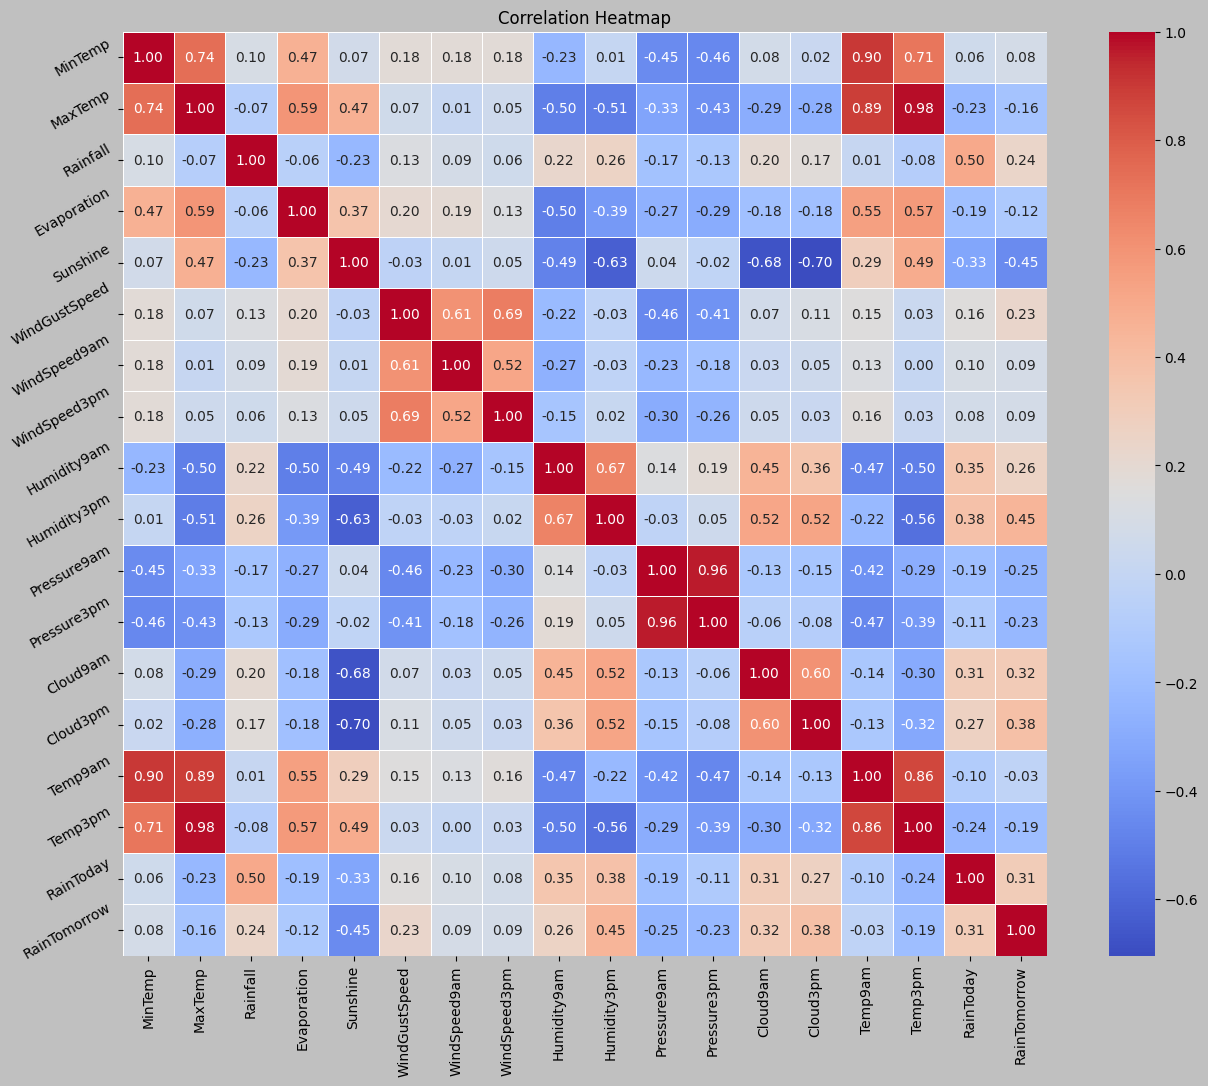

In [65]:
plot_heatmap(correlation)

Del mapa de calor de correlación anterior, podemos concluir que los siguientes pares de variables tienen una correlacion positiva y fuerte:

* Las variables MaxTemp y Temp3pm (0,98).
* Las variables Pressure9am y Pressure3pm (0,96).
* Las variables MinTemp y Temp9am (0,90).
* Las variables MaxTemp y Temp9am (0,89).
* Las variables Temp9am y Temp3pm (0,86).
* Las variables MinTemp y MaxTemp (0,74).
* Las variables MinTemp y Temp3pm (0,71).
* Las variables WindGustSpeed y WindSpeed3pm (0,69).

## 4.2 PairPlot.

In [66]:
def plot_pairplot(df, variables, kind='scatter', diag_kind='auto'):
    sns.pairplot(df[variables], kind=kind, diag_kind=diag_kind)
    plt.show()

La gráfica de pares muestra la relación entre estas variables.

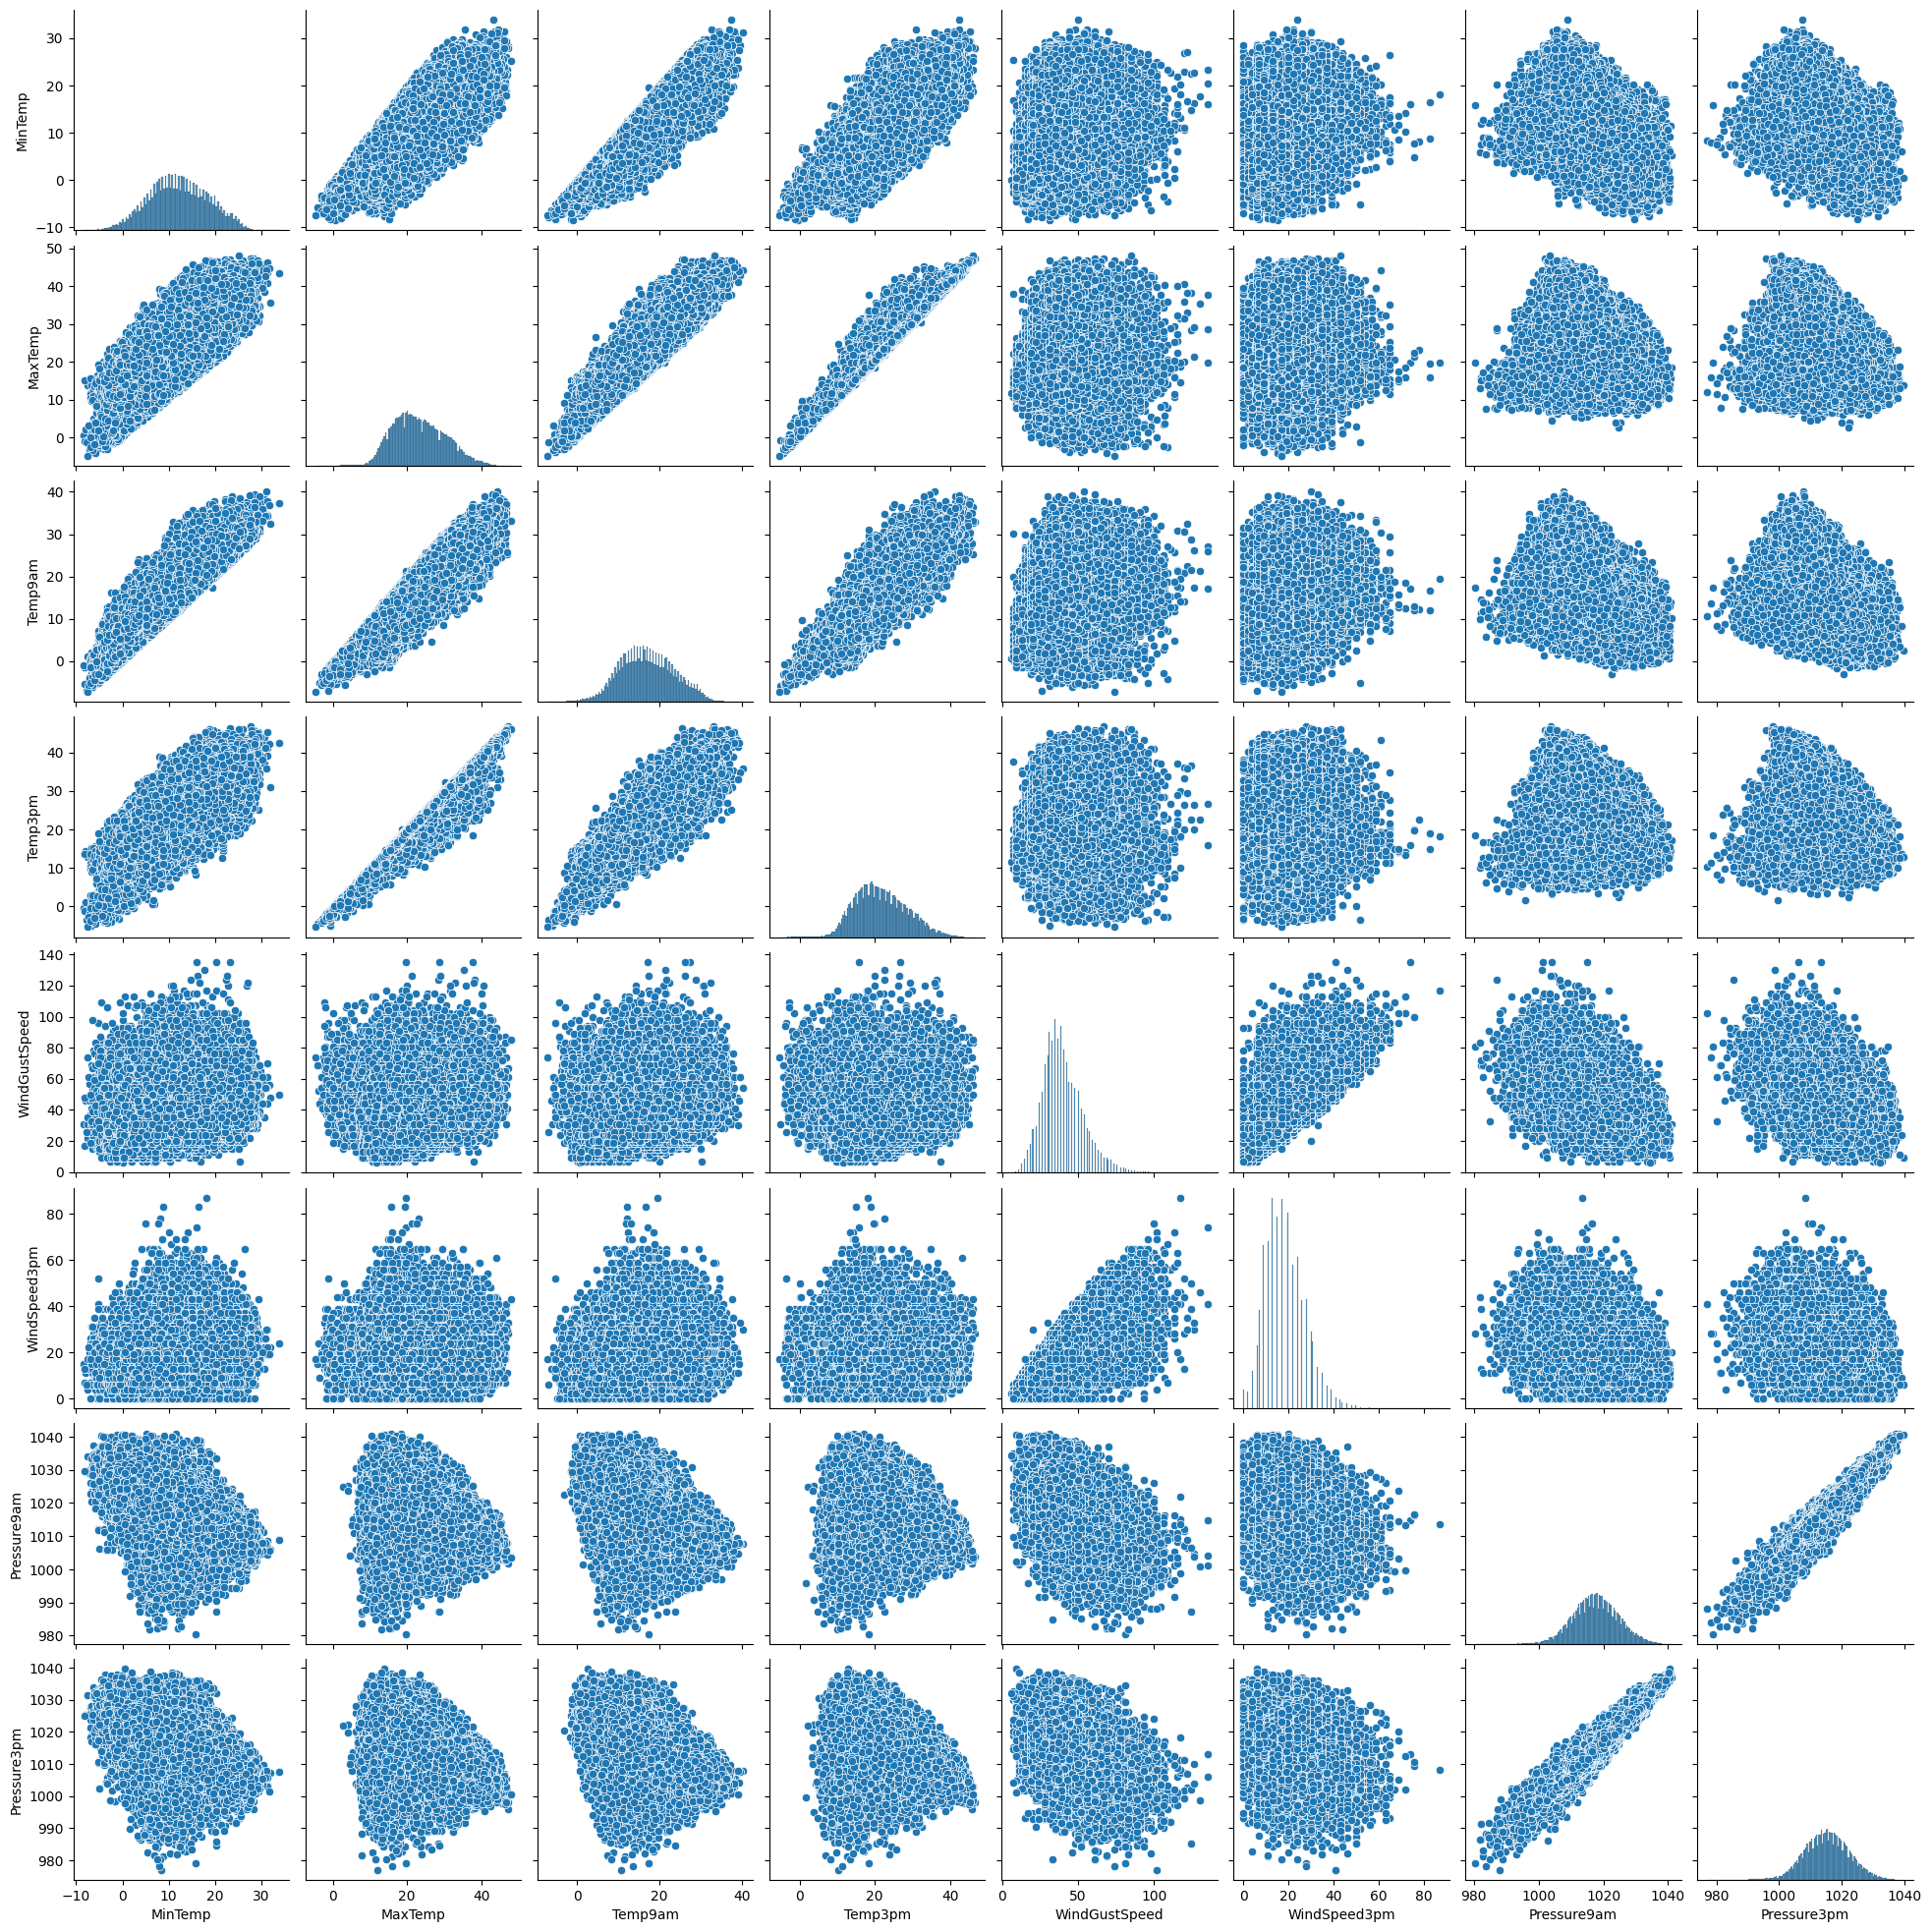

In [67]:
if PLOT:
    num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']
    plot_pairplot(data, num_var)

--------------------------------------------------------------------------

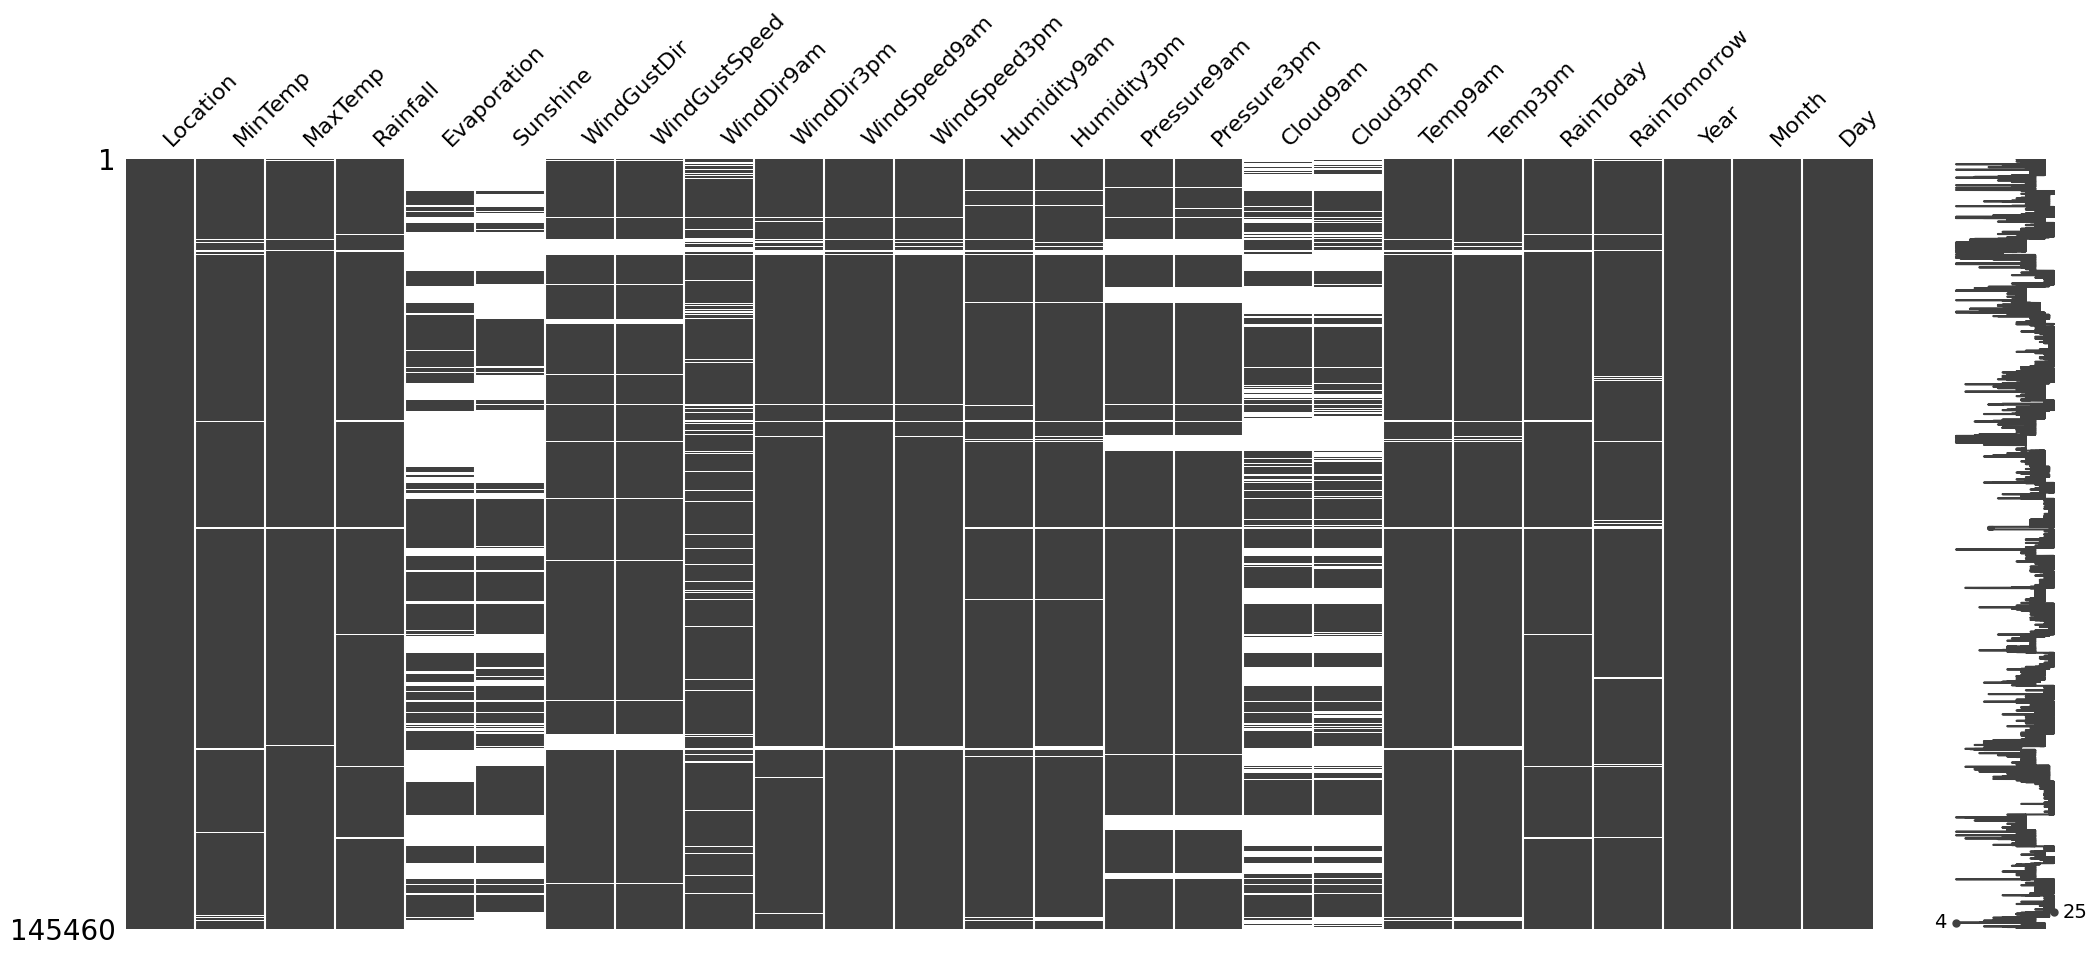

In [68]:
import missingno as msno

if PLOT:
    msno.matrix(data)

In [69]:
# missing_columns = data.columns[data.isnull().any()].tolist()

# if PLOT:
#     for column in missing_columns:
#         print(f"Visualizing missing values in column: {column}")
#         msno.matrix(data[[column]])
#         plt.show()

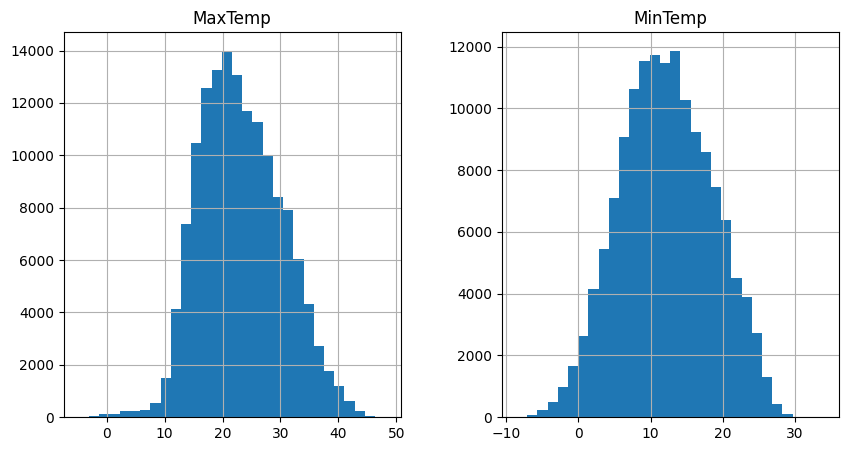

In [70]:
data[['MaxTemp', 'MinTemp']].hist(bins=30, figsize=(10, 5))
plt.show()

### Funcion Encode  

Preparacion de los datos, ya que la mayoria de algoritmos de aprendizaje automático requieren que las entradas sean numéricas.

In [71]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

def encode_columns(df):
    le = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':
            # Save the indices of null values
            null_indices = df[column].isnull()
            
            # Replace null values with a string that is not in the data
            df[column].fillna('NaN', inplace=True)
            
            # Perform the encoding
            df[column] = le.fit_transform(df[column])
            
            # Replace null values back
            df[column] = df[column].where(~null_indices, other=np.nan)
    return df

### Imputacion por mediana.

In [72]:
from sklearn.impute import SimpleImputer

def impute_median(df, columns):
    median_imputer = SimpleImputer(strategy='median')
    df[columns] = median_imputer.fit_transform(df[columns])
    return df

### Imputacion MICE.

In [73]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def impute_mice(df, columns, max_iter=10, random_state=0):
    mice_imputer = IterativeImputer(max_iter=max_iter, random_state=random_state)
    
    # Perform the imputation on the selected columns
    df[columns] = mice_imputer.fit_transform(df[columns])
    
    return df

### Clasificador de bosque aleatorio

In [74]:
from sklearn.ensemble import RandomForestClassifier

def impute_with_rf(df, column):
    rf = RandomForestClassifier(n_estimators=100)

    # Split the data into sets with and without missing values in the target column
    train_data = df[df[column].notnull()]
    test_data = df[df[column].isnull()]

    # Train the random forest classifier
    rf.fit(train_data.drop(column, axis=1), train_data[column])

    # Impute the missing values in the target column
    df.loc[df[column].isnull(), column] = rf.predict(test_data.drop(column, axis=1))

    return df

In [75]:
data_grouped = data.groupby('Location')

In [111]:
def print_categorical_columns_for_location(data_grouped, location):
    group = data_grouped.get_group(location)
    print(f"Number of records: {len(group)}")
    print_categoical_columns(group)

In [113]:
for location in data_grouped.groups.keys():
    print(f"Location: {location}")
    print_categorical_columns_for_location(data_grouped, location)
    print()

Location: Adelaide
Number of records: 3193
Categorical columns:
WindDir9am      274 null values.    	 16 unique values.
WindGustDir     26 null values.    	 16 unique values.
WindDir3pm      16 null values.    	 16 unique values.
Location        0 null values.    	 1 unique values.

Location: Albany
Number of records: 3040
Categorical columns:
WindGustDir     3040 null values.    	 0 unique values.
WindDir3pm      783 null values.    	 16 unique values.
WindDir9am      247 null values.    	 16 unique values.
Location        0 null values.    	 1 unique values.

Location: Albury
Number of records: 3040
Categorical columns:
WindDir9am      525 null values.    	 16 unique values.
WindDir3pm      46 null values.    	 16 unique values.
WindGustDir     32 null values.    	 16 unique values.
Location        0 null values.    	 1 unique values.

Location: AliceSprings
Number of records: 3040
Categorical columns:
WindDir9am      230 null values.    	 16 unique values.
WindGustDir     51 null va

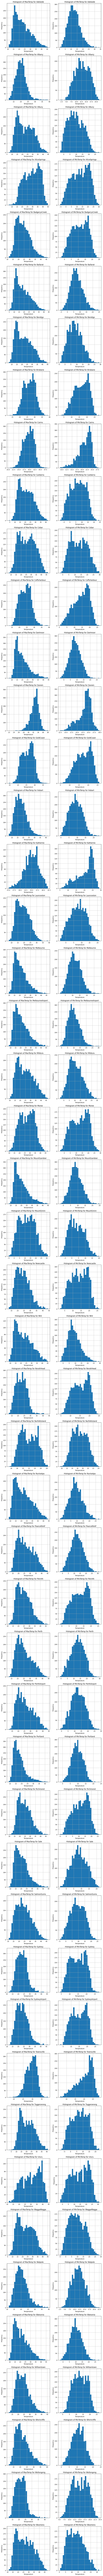

In [77]:
if PLOT:
    fig, axs = plt.subplots(len(data_grouped), 2, figsize=(10, 5*len(data_grouped)))

    for (location, group), ax_row in zip(data_grouped, axs):
        group[['MaxTemp', 'MinTemp']].hist(bins=30, ax=ax_row)
        for ax, column in zip(ax_row, ['MaxTemp', 'MinTemp']):
            ax.set_title(f'Histogram of {column} for {location}')
            ax.set_xlabel('Temperature')
            ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [78]:
data_encoded = data_grouped.apply(encode_columns, include_groups=False)

C:\Users\sevann radhak\AppData\Local\Temp\ipykernel_15692\2837892831.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna('NaN', inplace=True)
C:\Users\sevann radhak\AppData\Local\Temp\ipykernel_15692\2837892831.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [79]:
data_encoded.sample(10)

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Location                                                                  
Canberra      47987       0.1     16.4       0.0          NaN       NaN   
Darwin        139817     17.9     29.3       0.0          6.0      10.8   
Adelaide      98833       6.9     15.7       0.0          NaN       NaN   
SydneyAirport 34620      18.5     29.1       0.0          6.6      13.0   
Woomera       106731     13.7     30.0       0.0          NaN       NaN   
Sydney        30599      18.6     26.2       0.0          4.0       6.7   
GoldCoast     91597      14.5     21.4       7.8          NaN       NaN   
Richmond      29089       0.0     18.5       0.0          NaN       NaN   
Wollongong    44435      12.0     18.8       0.0          NaN       NaN   
Cobar         6182        5.4     20.4       0.0          4.6      10.0   

                      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
Location                                                                   
Canberra      47987           2.0           37.0        13.0        16.0   
Darwin        139817          0.0           37.0         0.0        10.0   
Adelaide      98833          16.0           20.0         5.0        16.0   
SydneyAirport 34620           4.0           50.0        15.0         1.0   
Woomera       106731          5.0           28.0         5.0         7.0   
Sydney        30599           NaN            NaN         2.0        10.0   
GoldCoast     91597          11.0           31.0         2.0         3.0   
Richmond      29089          15.0           48.0         4.0        15.0   
Wollongong    44435          13.0           31.0        13.0         0.0   
Cobar         6182           16.0           31.0        13.0        16.0   

                      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
Location                                                                     
Canberra      47987            7.0          11.0         83.0         45.0   
Darwin        139817          22.0          13.0         59.0         42.0   
Adelaide      98833            4.0          11.0         90.0         58.0   
SydneyAirport 34620            9.0          30.0         74.0         59.0   
Woomera       106731          15.0          15.0         28.0         17.0   
Sydney        30599            7.0          22.0         66.0         65.0   
GoldCoast     91597           20.0          17.0         76.0         68.0   
Richmond      29089            2.0          24.0         74.0         39.0   
Wollongong    44435           15.0           7.0         51.0         48.0   
Cobar         6182             6.0          15.0         51.0         35.0   

                      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
Location                                                                      
Canberra      47987        1027.3       1023.2       NaN       8.0      8.0   
Darwin        139817       1016.2       1011.8       5.0       5.0     22.5   
Adelaide      98833        1029.6       1026.0       NaN       NaN      9.6   
SydneyAirport 34620        1004.0       1000.3       1.0       1.0     23.0   
Woomera       106731       1022.9       1018.8       0.0       1.0     22.9   
Sydney        30599        1024.1       1022.3       2.0       6.0     22.9   
GoldCoast     91597        1019.9       1016.8       NaN       NaN     18.9   
Richmond      29089        1016.6       1013.2       NaN       NaN      8.2   
Wollongong    44435        1018.1       1014.0       NaN       NaN     16.0   
Cobar         6182         1019.4       1016.6       0.0       3.0     13.4   

                      Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
Location                                                                  
Canberra      47987      15.9        0.0           1.0  2014      8   25  
Darwin        139817     28.7        0.0           0.0  2010      6    7  
Adelaide      98833   

Verificar que todas las columnas sean numericas.

In [80]:
print_categoical_columns(data_encoded)
print()
print_numerical_columns(data_encoded)

Categorical columns:

Numerical columns:
Sunshine 	 69835 null values.
Evaporation 	 62790 null values.
Cloud3pm 	 59358 null values.
Cloud9am 	 55888 null values.
Pressure9am 	 15065 null values.
Pressure3pm 	 15028 null values.
WindDir9am 	 10566 null values.
WindGustDir 	 10326 null values.
WindGustSpeed 	 10263 null values.
Humidity3pm 	 4507 null values.
WindDir3pm 	 4228 null values.
Temp3pm 	 3609 null values.
RainTomorrow 	 3267 null values.
Rainfall 	 3261 null values.
RainToday 	 3261 null values.
WindSpeed3pm 	 3062 null values.
Humidity9am 	 2654 null values.
WindSpeed9am 	 1767 null values.
Temp9am 	 1767 null values.
MinTemp 	 1485 null values.
MaxTemp 	 1261 null values.


In [81]:
missing_percentage(data_encoded)

Total  Percent
Sunshine       69835    48.01
Evaporation    62790    43.17
Cloud3pm       59358    40.81
Cloud9am       55888    38.42
Pressure9am    15065    10.36
Pressure3pm    15028    10.33
WindDir9am     10566     7.26
WindGustDir    10326     7.10
WindGustSpeed  10263     7.06
Humidity3pm     4507     3.10
WindDir3pm      4228     2.91
Temp3pm         3609     2.48
RainTomorrow    3267     2.25
RainToday       3261     2.24
Rainfall        3261     2.24
WindSpeed3pm    3062     2.11
Humidity9am     2654     1.82
Temp9am         1767     1.21
WindSpeed9am    1767     1.21
MinTemp         1485     1.02
MaxTemp         1261     0.87

Verificacion de comportamiento logico en variables MinTemp y MaxTemp.

In [82]:
print(data[data['MinTemp'] > data['MaxTemp']])

Empty DataFrame
Columns: [Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow, Year, Month, Day]
Index: []


In [83]:
print(data_encoded[data_encoded['MinTemp'] > data_encoded['MaxTemp']])

Empty DataFrame
Columns: [MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow, Year, Month, Day]
Index: []


Con el objetivo de utilizar la mayor cantidad de datos reales, iniciamos la Imputacion de datos primero a aquellas columnas con menor cantidad de datos faltantes.

In [84]:
data_imputed = data_encoded.copy()

In [85]:
columns = ['MaxTemp', 'MinTemp', 'Temp9am', 'Temp3pm']
data_imputed = impute_mice(data_imputed, columns, max_iter=75)

In [86]:
print(data_imputed[data_imputed['MinTemp'] > data_imputed['MaxTemp']])

Empty DataFrame
Columns: [MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow, Year, Month, Day]
Index: []


In [87]:
missing_percentage(data_imputed)

Total  Percent
Sunshine       69835    48.01
Evaporation    62790    43.17
Cloud3pm       59358    40.81
Cloud9am       55888    38.42
Pressure9am    15065    10.36
Pressure3pm    15028    10.33
WindDir9am     10566     7.26
WindGustDir    10326     7.10
WindGustSpeed  10263     7.06
Humidity3pm     4507     3.10
WindDir3pm      4228     2.91
RainTomorrow    3267     2.25
RainToday       3261     2.24
Rainfall        3261     2.24
WindSpeed3pm    3062     2.11
Humidity9am     2654     1.82
WindSpeed9am    1767     1.21

In [88]:
data_imputed.sample(10)

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Location                                                              
Hobart    130821     13.6     20.4       0.0          4.0       7.3   
GoldCoast 90557      18.3     31.1       0.0          NaN       NaN   
Brisbane  86380      19.9     28.5       0.0          6.0       9.9   
Cairns    89542      20.0     26.0       5.4          6.2       5.8   
Uluru     145234     17.4     34.9       0.0          NaN       NaN   
Bendigo   60050       6.3     21.4       0.0          NaN       NaN   
Sydney    30411      15.6     17.0       2.6         10.4       3.0   
          31289      22.6     27.6       0.0          5.0       3.8   
Albany    111572     11.6     23.2       0.0          NaN       NaN   
Adelaide  97118       4.1     17.1       0.0          1.8       8.9   

                  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
Location                                                               
Hobart    130821          2.0           30.0        12.0         2.0   
GoldCoast 90557           7.0           72.0         7.0        15.0   
Brisbane  86380           1.0           24.0         1.0         1.0   
Cairns    89542          11.0           57.0        11.0        11.0   
Uluru     145234         12.0           39.0        11.0        11.0   
Bendigo   60050           7.0           26.0         NaN         7.0   
Sydney    30411           NaN            NaN        12.0        11.0   
          31289           9.0           43.0         9.0        10.0   
Albany    111572          NaN            NaN         3.0         NaN   
Adelaide  97118           3.0           39.0         1.0         3.0   

                  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
Location                                                                 
Hobart    130821           6.0          20.0         84.0         61.0   
GoldCoast 90557           26.0          43.0         27.0         14.0   
Brisbane  86380           11.0          11.0         59.0         53.0   
Cairns    89542           35.0          37.0         70.0         68.0   
Uluru     145234          22.0          19.0         25.0         13.0   
Bendigo   60050            0.0          11.0         94.0         62.0   
Sydney    30411           17.0          24.0         88.0         60.0   
          31289           20.0          13.0         83.0         70.0   
Albany    111572           4.0           NaN         77.0          NaN   
Adelaide  97118           13.0          20.0         50.0         44.0   

                  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
Location                                                                  
Hobart    130821       1022.0       1020.5       NaN       NaN     15.4   
GoldCoast 90557        1008.0       1003.3       NaN       NaN     27.4   
Brisbane  86380        1023.3       1020.9       5.0       3.0     26.2   
Cairns    89542        1022.3       1019.3       6.0       8.0     21.4   
Uluru     145234       1010.8       1008.0       NaN       NaN     26.3   
Bendigo   60050        1023.9       1021.5       NaN       1.0     13.7   
Sydney    30411        1015.5       1018.0       8.0       5.0     15.6   
          31289        1014.7       1014.0       NaN       NaN     23.5   
Albany    111572       1019.0       1015.2       7.0       NaN     13.1   
Adelaide  97118        1026.8       1022.6       NaN       NaN     12.6   

                    Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
Location                                                                
Hobart    130821  19.800000        0.0           0.0  2011      3   11  
GoldCoast 90557   30.600000        0.0           0.0  2009     10   14  
Brisbane  86380   27.400000        0.0           0.0  2015      3   29  
Cairns    89542   22.900000        1.0           1.0  2015      7   29  
Uluru     145234  34.000000        0.0           0.0  2016     11   12  

In [89]:
print(data_imputed[(data_imputed['MinTemp'] > data_imputed['Temp9am']) | (data_imputed['MinTemp'] > data_imputed['Temp3pm']) | (data_imputed['MaxTemp'] < data_imputed['Temp9am']) | (data_imputed['MaxTemp'] < data_imputed['Temp3pm'])][['MinTemp', 'Temp9am', 'Temp3pm', 'MaxTemp']])

                 MinTemp  Temp9am  Temp3pm  MaxTemp
Location                                           
Adelaide 96339       9.9     10.0      9.6     12.0
         96403      13.1     14.6     11.3     15.0
         96455      22.5     24.8     22.0     26.2
         96565      20.7     23.7     17.9     23.8
         96616      21.3     22.2     18.0     22.2
...                  ...      ...      ...      ...
Woomera  107019     25.1     26.8     21.7     27.7
         107022     15.4     16.7     15.2     17.2
         107969     16.7     17.2     16.6     20.6
         108389     26.3     26.8     25.3     30.1
         108407     23.6     24.0     23.4     26.4

[1299 rows x 4 columns]


Hay 1299 con inconsistencias logicas en relacion a los valores de sus temperaturas. 

#### Post-procesamiento

In [90]:
# If Temp9am or Temp3pm is less than MinTemp, set it equal to MinTemp
data_imputed['Temp9am'] = data_imputed[['Temp9am', 'MinTemp']].max(axis=1)
data_imputed['Temp3pm'] = data_imputed[['Temp3pm', 'MinTemp']].max(axis=1)

# If Temp9am or Temp3pm is greater than MaxTemp, set it equal to MaxTemp
data_imputed['Temp9am'] = data_imputed[['Temp9am', 'MaxTemp']].min(axis=1)
data_imputed['Temp3pm'] = data_imputed[['Temp3pm', 'MaxTemp']].min(axis=1)

In [91]:
print(data_imputed[(data_imputed['MinTemp'] > data_imputed['Temp9am']) | (data_imputed['MinTemp'] > data_imputed['Temp3pm']) | (data_imputed['MaxTemp'] < data_imputed['Temp9am']) | (data_imputed['MaxTemp'] < data_imputed['Temp3pm'])][['MinTemp', 'Temp9am', 'Temp3pm', 'MaxTemp']])

Empty DataFrame
Columns: [MinTemp, Temp9am, Temp3pm, MaxTemp]
Index: []


Observamos ahora un comportamient logico entre las columnas MinTemp, Temp9am, Temp3pm y MaxTemp.

In [92]:
missing_percentage(data_imputed)

Total  Percent
Sunshine       69835    48.01
Evaporation    62790    43.17
Cloud3pm       59358    40.81
Cloud9am       55888    38.42
Pressure9am    15065    10.36
Pressure3pm    15028    10.33
WindDir9am     10566     7.26
WindGustDir    10326     7.10
WindGustSpeed  10263     7.06
Humidity3pm     4507     3.10
WindDir3pm      4228     2.91
RainTomorrow    3267     2.25
RainToday       3261     2.24
Rainfall        3261     2.24
WindSpeed3pm    3062     2.11
Humidity9am     2654     1.82
WindSpeed9am    1767     1.21

### Imputacion de variables numericas con pocos datos faltantes.

In [93]:
columns = ['Pressure9am', 'Pressure3pm', 'WindGustSpeed', 'Humidity3pm', 'Humidity9am']
data_imputed = impute_mice(data_imputed, columns, max_iter=50)

In [94]:
missing_percentage(data_imputed)

Total  Percent
Sunshine      69835    48.01
Evaporation   62790    43.17
Cloud3pm      59358    40.81
Cloud9am      55888    38.42
WindDir9am    10566     7.26
WindGustDir   10326     7.10
WindDir3pm     4228     2.91
RainTomorrow   3267     2.25
RainToday      3261     2.24
Rainfall       3261     2.24
WindSpeed3pm   3062     2.11
WindSpeed9am   1767     1.21

### Imputacion de variables categoricas.

In [95]:
from sklearn.impute import SimpleImputer

cat_vars = ['WindDir9am', 'WindGustDir', 'WindDir3pm', 'RainToday']
imp_mode = SimpleImputer(strategy='most_frequent')
data_imputed[cat_vars] = imp_mode.fit_transform(data_imputed[cat_vars])

In [96]:
missing_percentage(data_imputed)

Total  Percent
Sunshine      69835    48.01
Evaporation   62790    43.17
Cloud3pm      59358    40.81
Cloud9am      55888    38.42
RainTomorrow   3267     2.25
Rainfall       3261     2.24
WindSpeed3pm   3062     2.11
WindSpeed9am   1767     1.21

Imputacion de variables con valroes atipicos.

In [97]:
columns = ['Evaporation', 'WindSpeed9am', 'WindSpeed3pm']
df = impute_median(data_imputed, columns)

### Imputacion de variables numericas con alta cantidad de datos faltantes.

In [98]:
columns = ['Sunshine', 'Cloud3pm', 'Cloud9am']
data_imputed = impute_mice(data_imputed, columns, max_iter=50)

In [99]:
missing_percentage(data_imputed)

Total  Percent
RainTomorrow   3267     2.25
Rainfall       3261     2.24

Para la variable 'Rainfall', imputo los valores faltantes con 0, asumiendo que si el valor de la lluvia no se registró, entonces probablemente no llovió ese día. 

In [100]:
data_imputed['Rainfall'] = data_imputed['Rainfall'].fillna(0)

In [101]:
missing_percentage(data_imputed)

Total  Percent
RainTomorrow   3267     2.25

Elimino la variable RainTomorrow ya que es la variable objetivo.

In [102]:
data_imputed = data_imputed.drop('RainTomorrow', axis=1)

In [103]:
data_imputed.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

La totalidad de los datos han sido imputados correctamente.